In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, glob
from pathlib import Path
import re
import json

In [4]:
data_path = 'cleaned_data/'
file_name = 'industrial_production_index.csv'
df = pd.read_csv(os.path.join(data_path, file_name))

In [13]:
df.iloc[:, 3:].describe()

,B,B05,B06,B07,B08,B081,B0811,B0812,B089,B0891,...,C323,C329,C3291,C3299,C33,MIG_CAG,MIG_DCOG,MIG_ING,MIG_NDCOG,MIG_NRG_X_E
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,...,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,98.363850,122.195305,101.146948,96.519718,87.196244,87.255869,91.962911,81.979812,83.911268,77.743192,...,67.921127,95.592019,86.769953,98.793427,85.492958,88.369484,92.004225,91.252113,94.219249,98.612207
std,19.992991,17.663556,14.765122,36.994627,23.528954,26.974592,28.527391,25.373333,21.681156,22.540118,...,36.849138,26.015033,39.600444,24.760554,33.139990,33.777785,23.250192,24.858108,25.954293,19.128220
min,56.800000,74.100000,77.200000,18.000000,35.700000,27.500000,35.400000,23.600000,34.500000,33.600000,...,0.000000,49.200000,20.000000,51.300000,32.400000,31.800000,47.200000,47.700000,54.200000,64.900000
25%,83.000000,109.200000,90.900000,73.900000,67.300000,66.300000,65.800000,62.300000,68.900000,61.200000,...,42.700000,78.100000,53.400000,83.100000,55.200000,59.900000,72.500000,68.900000,72.200000,83.300000
50%,99.100000,122.800000,97.300000,99.000000,86.900000,87.400000,93.500000,81.000000,82.600000,77.400000,...,67.600000,90.400000,81.200000,93.900000,82.000000,83.600000,92.200000,91.400000,89.400000,95.900000
75%,112.400000,135.100000,105.600000,117.400000,106.900000,110.500000,116.400000,99.100000,96.800000,93.800000,...,94.400000,105.100000,111.200000,108.200000,114.600000,115.000000,107.100000,109.800000,112.900000,112.800000
max,148.400000,166.300000,143.800000,195.700000,132.900000,137.400000,150.200000,157.000000,155.600000,140.800000,...,189.000000,184.400000,200.000000,199.200000,185.500000,216.900000,158.500000,152.500000,161.900000,149.600000


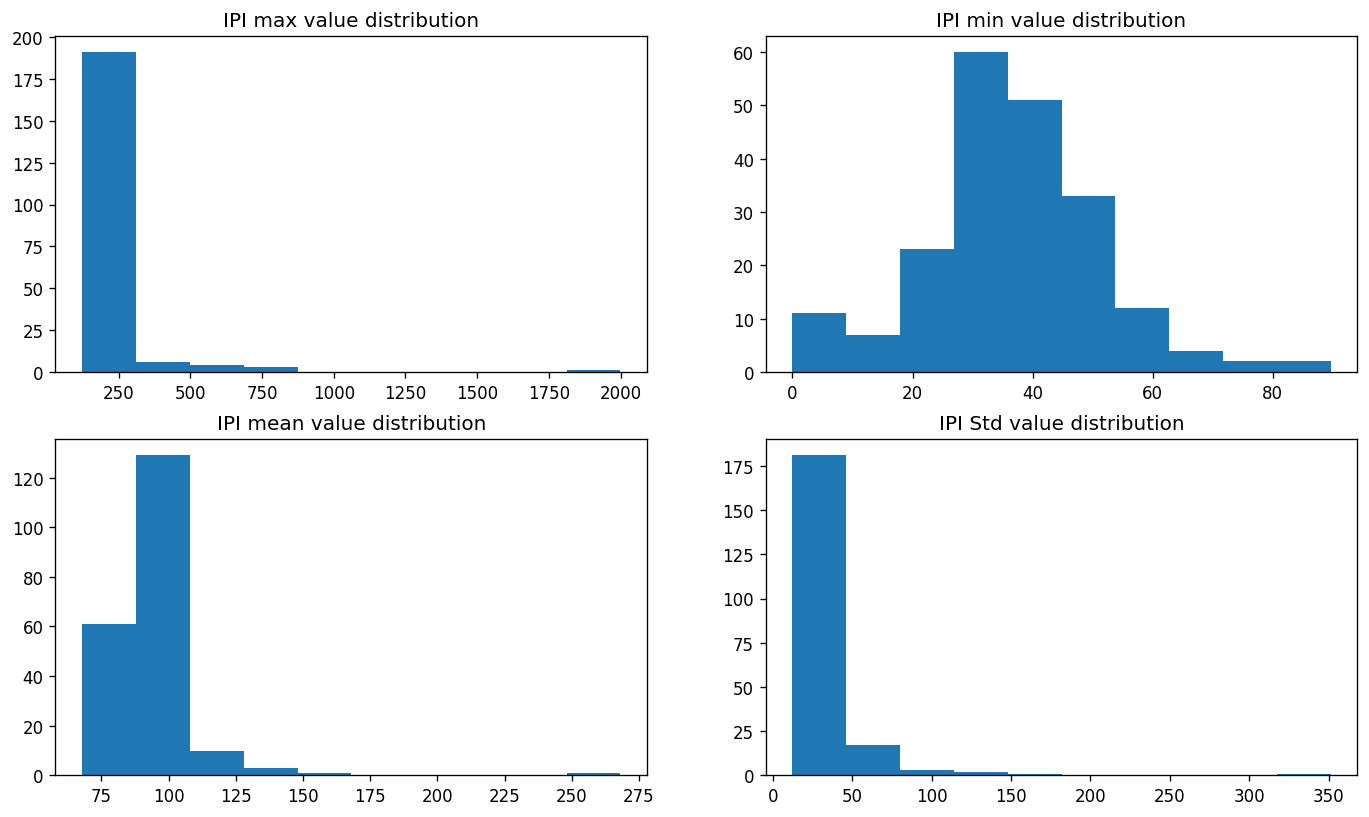

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8), dpi=120)
axs = axs.flatten()

ax = axs[0]
max_vals = df.iloc[:, 3:].describe().loc['max']
ax.hist(max_vals)
ax.set_title('IPI max value distribution')

ax = axs[1]
max_vals = df.iloc[:, 3:].describe().loc['min']
ax.hist(max_vals)
ax.set_title('IPI min value distribution')

ax = axs[2]
max_vals = df.iloc[:, 3:].describe().loc['mean']
ax.hist(max_vals)
ax.set_title('IPI mean value distribution')

ax = axs[3]
max_vals = df.iloc[:, 3:].describe().loc['std']
ax.hist(max_vals)
ax.set_title('IPI Std value distribution')

plt.show()

In [24]:
data_description = df.iloc[:, 3:].describe()
data_description = data_description.T

In [28]:
cond = data_description['mean'] > 100
data_description[cond]

,count,mean,std,min,25%,50%,75%,max
B05,213.0,122.195305,17.663556,74.1,109.2,122.8,135.1,166.3
B06,213.0,101.146948,14.765122,77.2,90.9,97.3,105.6,143.8
B0893,213.0,108.223005,118.777464,1.0,8.2,67.7,182.4,617.1
C1011,213.0,103.640845,36.605488,45.1,75.0,95.8,132.4,200.8
C103,213.0,107.516432,32.389007,44.5,82.8,102.4,126.0,216.5
C1039,213.0,111.314554,34.969733,51.6,86.4,104.9,128.3,226.5
C104,213.0,102.611268,14.531471,71.5,92.8,101.6,111.9,166.0
C1041,213.0,104.619718,16.834743,69.6,94.1,102.5,115.4,194.2
C108,213.0,101.570892,50.890011,31.9,61.0,86.1,133.5,229.9
C1081,213.0,110.684507,162.027380,1.1,4.6,10.0,147.5,600.9
